In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

In [3]:
import matplotlib
from matplotlib import pyplot as plt

import numpy as np

from scipy import stats

import csv

In [7]:
income = []
age = []
experience = []
marital_status = []
own_house = []
own_car = []
profession = []
state = []
risk_flag = []

with open('data_valid.csv','r', encoding ='utf-8') as f:
    data_reader = csv.reader(f)
    
    header = next(data_reader)
    print (header)
    
    for row in data_reader:
        income.append(float(row[1]))
        age.append(float(row[2]))
        experience.append(float(row[3]))
        marital_status.append(row[4])
        own_house.append(row[5])
        own_car.append(row[6])
        profession.append(row[7])
        state.append(row[8])
        risk_flag.append(float(row[9]))

['', 'Income', 'Age', 'Experience', 'Married/Single', 'House Ownership', 'Car Ownership', 'Profession', 'State', 'Risk Flag']


In [8]:
print(income[0:10])
print(age[0:10])
print(experience[0:10])
print(marital_status[0:10])
print(own_house[0:10])
print(own_car[0:10])
print(profession[0:10])
print(state[0:10])
print(risk_flag[0:10])

[1303834.0, 7574516.0, 3991815.0, 6256451.0, 5768871.0, 6915937.0, 3954973.0, 1706172.0, 4634680.0, 6623263.0]
[23.0, 40.0, 66.0, 41.0, 47.0, 64.0, 58.0, 33.0, 78.0, 22.0]
[3.0, 10.0, 4.0, 2.0, 11.0, 0.0, 14.0, 2.0, 7.0, 4.0]
['single', 'single', 'married', 'single', 'single', 'single', 'married', 'single', 'single', 'single']
['rented', 'rented', 'rented', 'rented', 'rented', 'rented', 'rented', 'rented', 'rented', 'rented']
['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no']
['Mechanical engineer', 'Software developer', 'Technical writer', 'Software developer', 'Civil servant', 'Civil servant', 'Librarian', 'Economist', 'Flight attendant', 'Designer']
['Madhya Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil Nadu', 'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Bihar', 'Andhra Pradesh']
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# 1. Mối tương quan giữa rủi ro với thu nhập, tuổi, và số năm kinh nghiệm

In [9]:
coeff_risk_income = np.corrcoef(risk_flag, income)
coeff_risk_age = np.corrcoef(risk_flag, age)
coeff_risk_experience = np.corrcoef(risk_flag, experience)

print(coeff_risk_income)
print(coeff_risk_age)
print(coeff_risk_experience)

[[1.         0.00138792]
 [0.00138792 1.        ]]
[[1.00000000e+00 4.74796425e-04]
 [4.74796425e-04 1.00000000e+00]]
[[ 1.         -0.01026499]
 [-0.01026499  1.        ]]


# 2. Tần số và tần suất người vay có rủi ro và không rủi ro

In [53]:
risk_flag_1 = []
risk_flag_0 = []

for item in risk_flag:
    if item == 1:
        risk_flag_1.append (item)
    else:
        risk_flag_0.append (item)

In [56]:
print(risk_flag_1[0:10])
print(risk_flag_0[0:10])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


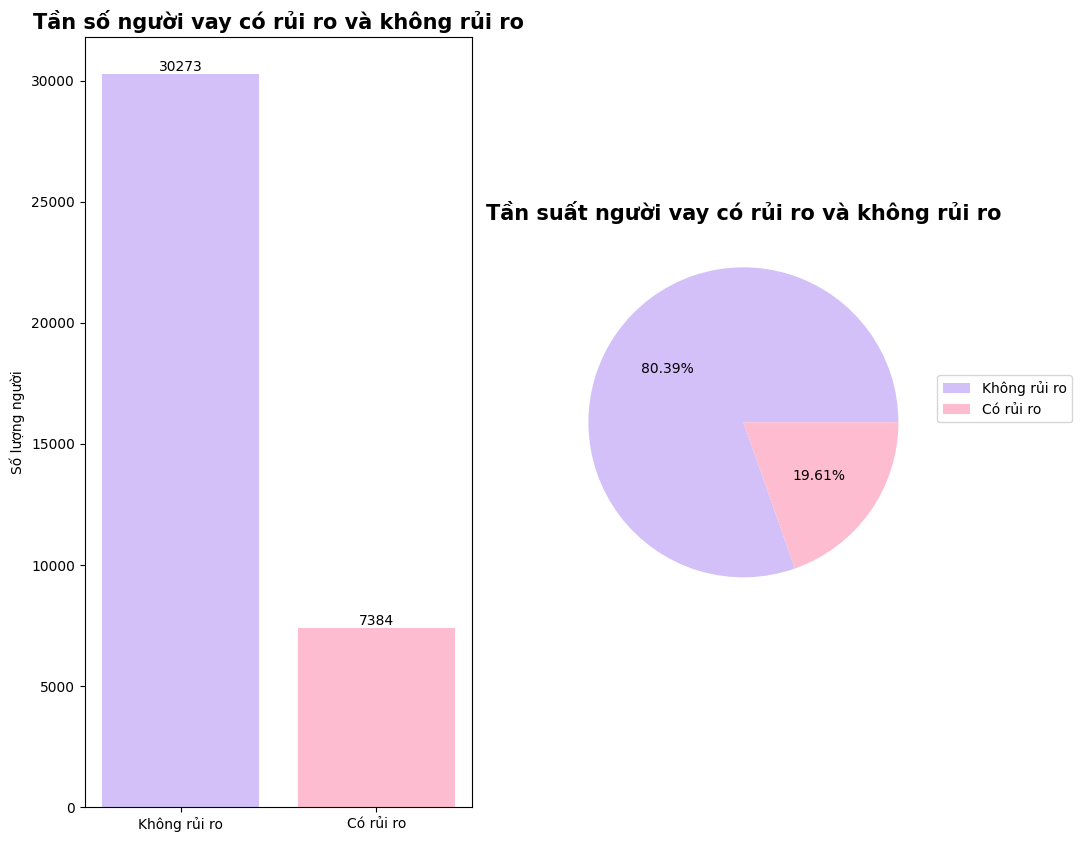

In [322]:
x = list(set(risk_flag))
y = [len(risk_flag_0), len(risk_flag_1)]
tansuat_0 = len(risk_flag_0)/len(risk_flag)*100
tansuat_1 = len(risk_flag_1)/len(risk_flag)*100
tansuat = [tansuat_0, tansuat_1]

fig = plt.figure(figsize = (11,10))
ax1 = fig.add_subplot (1,2,1)
ax1.bar (x, y, color =["#D3C0F9","#FDBCCF"])
plt.xticks([0,1],["Không rủi ro", "Có rủi ro"])
ax1.set_ylabel("Số lượng người")
ax1 = plt.gca()
ax1.bar_label(container = ax1.containers[0])
plt.title("Tần số người vay có rủi ro và không rủi ro", fontweight= "bold",fontsize=15)

ax2 = fig.add_subplot (1,2,2)
ax2.pie (tansuat, autopct = '%.2f%%',colors =["#D3C0F9","#FDBCCF"])
ax2.legend(labels = ["Không rủi ro","Có rủi ro"], loc = (1,0.5))
plt.title("Tần suất người vay có rủi ro và không rủi ro", fontweight= "bold",fontsize=15)

plt.savefig("Tần suất người vay có rủi ro và không rủi ro.png", transparent=True)
plt.show()

# 3. Tập trung phân tích thông tin về những người có rủi ro khi cho vay

In [84]:
income_1 = []
age_1 = []
experience_1 = []
marital_status_1 = []
own_house_1 = []
own_car_1 = []
profession_1 = []
state_1 = []

with open('data_valid.csv','r', encoding ='utf-8') as f:
    data_reader = csv.reader(f)
    header = next(data_reader)
    
    for row in data_reader:
        if row[9] == "1":
            income_1.append(float(row[1]))
            age_1.append(float(row[2]))
            experience_1.append(float(row[3]))
            marital_status_1.append(row[4])
            own_house_1.append(row[5])
            own_car_1.append(row[6])
            profession_1.append(row[7])
            state_1.append(row[8])


In [85]:
print(income_1[0:10])
print(age_1[0:10])
print(experience_1[0:10])
print(marital_status_1[0:10])
print(own_house_1[0:10])
print(own_car_1[0:10])
print(profession_1[0:10])
print(state_1[0:10])


[6256451.0, 5768871.0, 9420838.0, 3666346.0, 8832725.0, 9760667.0, 9639445.0, 1885923.0, 5554586.0, 9861298.0]
[41.0, 47.0, 48.0, 56.0, 64.0, 63.0, 45.0, 46.0, 39.0, 59.0]
[2.0, 11.0, 6.0, 12.0, 5.0, 17.0, 9.0, 16.0, 18.0, 16.0]
['single', 'single', 'single', 'single', 'single', 'single', 'single', 'single', 'single', 'single']
['rented', 'rented', 'rented', 'rented', 'rented', 'rented', 'rented', 'rented', 'rented', 'rented']
['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
['Software developer', 'Civil servant', 'Technical writer', 'Politician', 'Biomedical engineer', 'Chartered accountant', 'Technician', 'Magistrate', 'Software developer', 'Technical writer']
['Odisha', 'Tamil Nadu', 'Tamil Nadu', 'Maharashtra', 'Puducherry', 'Madhya Pradesh', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'West Bengal']


## a. Mô tả đơn biến (income)

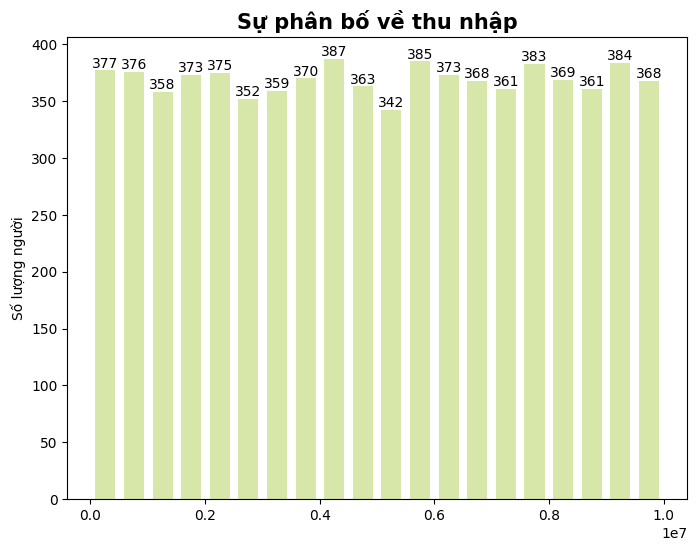

In [325]:
fig = plt.figure(figsize = (8,6))

ax1 = fig.add_subplot(1,1,1)
ax1.hist(income_1, bins=20, rwidth = 0.7, color="#D7E7A9")
ax1 = plt.gca()
ax1.bar_label(container = ax1.containers[0])
ax1.set_ylabel("Số lượng người")
plt.title("Sự phân bố về thu nhập",fontweight="bold",fontsize=15)
plt.show()

In [326]:
# giá trị min, max
mi = np.min(income_1)
ma = np.max(income_1)

print("min", mi )
print("max", ma)

min 10675.0
max 9994501.0


In [327]:
# giá trị mean, median, mode
mean = np.mean(income_1)

median = np.median(income_1)

counts, intervals = np.histogram(income_1, bins=20)
mode_idx = np.argmax(counts)
mode = np.mean([intervals[mode_idx], intervals[mode_idx+1]])

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 5007946.06351571
Median: 5006238.5
Mode: 4253801.05


In [328]:
#Phân vị
np.quantile(income_1, [0.25, 0.5, 0.75])

array([2492112.25, 5006238.5 , 7529020.75])

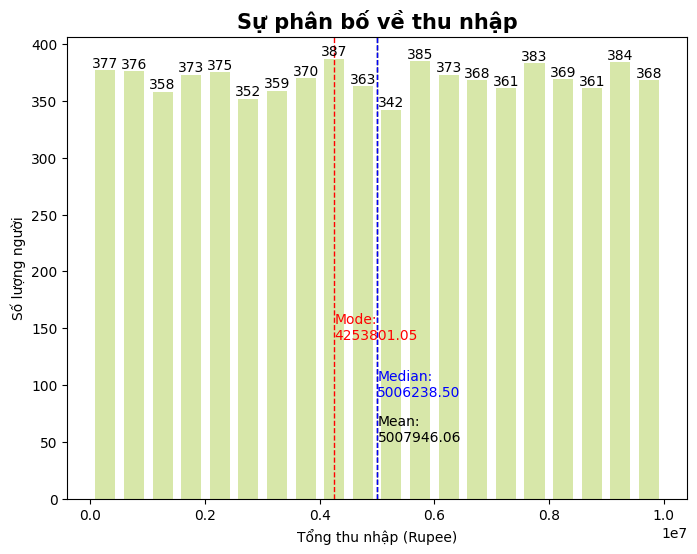

In [333]:
fig = plt.figure(figsize = (8,6))

ax1 = fig.add_subplot(1,1,1)
ax1.hist(income_1, bins=20, rwidth = 0.7, color="#D7E7A9")
ax1 = plt.gca()
ax1.bar_label(container = ax1.containers[0])
ax1.set_xlabel("Tổng thu nhập (Rupee)")
ax1.set_ylabel("Số lượng người")
plt.title("Sự phân bố về thu nhập",fontweight="bold",fontsize=15)

#vẽ mean, median, mode
ax1.axvline (mean, color ='k', linestyle='dashed',linewidth=1)
ax1.text(mean-10,50,f"Mean:\n{mean:.2f}", color ='k')

ax1.axvline (median, color ='b', linestyle='dashed',linewidth=1)
ax1.text(median-50,90,f"Median:\n{median:.2f}", color ='b')

ax1.axvline (mode, color ='r', linestyle='dashed',linewidth=1)
ax1.text(mode,140,f"Mode:\n{mode:.2f}", color ='r')

plt.savefig("Sự phân bố về thu nhập.png", transparent=True)
plt.show()

## b. Mô tả đơn biến (age)

In [334]:
# giá trị min, max
mi = np.min(age_1)
ma = np.max(age_1)

print("min", mi )
print("max", ma)

min 21.0
max 79.0


In [351]:
# giá trị mean, median, mode
mean = np.mean(age_1)

median = np.median(age_1)

counts, intervals = np.histogram(age_1, bins=13)
mode_idx = np.argmax(counts)
mode = np.mean([intervals[mode_idx], intervals[mode_idx+1]])

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 53.307827735644636
Median: 54.0
Mode: 58.92307692307692


In [336]:
#Phân vị
np.quantile(age_1, [0.25, 0.5, 0.75])

array([40., 54., 66.])

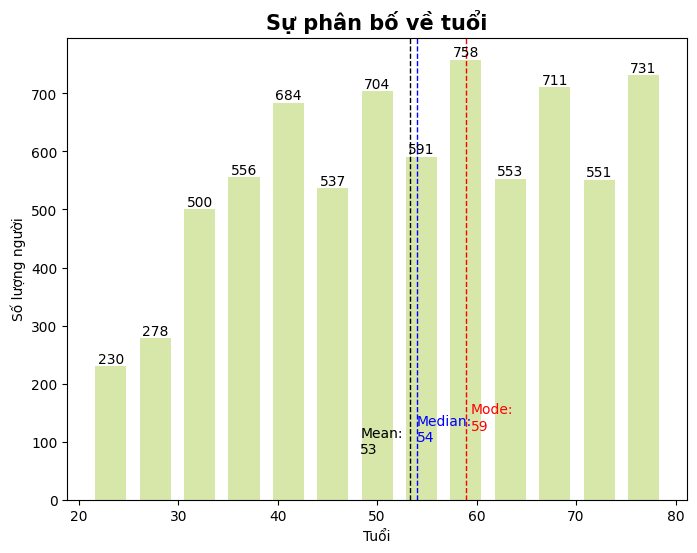

In [337]:
fig = plt.figure(figsize = (8,6))

ax1 = fig.add_subplot(1,1,1)
ax1.hist(age_1, bins=13, rwidth = 0.7, color="#D7E7A9")
ax1 = plt.gca()
ax1.bar_label(container = ax1.containers[0])
ax1.set_xlabel("Tuổi")
ax1.set_ylabel("Số lượng người")
plt.title("Sự phân bố về tuổi",fontweight="bold",fontsize=15)

#vẽ mean, median, mode
ax1.axvline (mean, color ='k', linestyle='dashed',linewidth=1)
ax1.text(mean-5,80,f"Mean:\n{mean:.0f}", color ='k')

ax1.axvline (median, color ='b', linestyle='dashed',linewidth=1)
ax1.text(median,100,f"Median:\n{median:.0f}", color ='b')

ax1.axvline (mode, color ='r', linestyle='dashed',linewidth=1)
ax1.text(mode+0.5,120,f"Mode:\n{mode:.0f}", color ='r')

plt.savefig("Sự phân bố về tuổi.png", transparent=True)
plt.show()

## c. Mô tả đơn biến (experience)

In [347]:
# giá trị min, max
mi = np.min(experience_1)
ma = np.max(experience_1)

print("min", mi )
print("max", ma)

min 0.0
max 20.0


In [352]:
# giá trị mean, median, mode
mean = np.mean(experience_1)

median = np.median(experience_1)

counts, intervals = np.histogram(experience_1, bins=10)
mode_idx = np.argmax(counts)
mode = np.mean([intervals[mode_idx], intervals[mode_idx+1]])

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 9.180390032502709
Median: 9.0
Mode: 19.0


In [353]:
#Phân vị
np.quantile(experience_1, [0.25, 0.5, 0.75])

array([ 4.,  9., 14.])

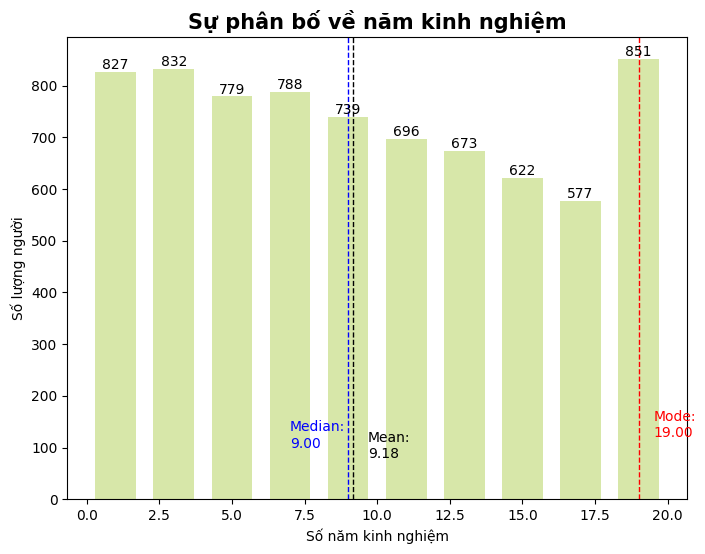

In [354]:
fig = plt.figure(figsize = (8,6))

ax1 = fig.add_subplot(1,1,1)
ax1.hist(experience_1, bins=10, rwidth = 0.7, color="#D7E7A9")
ax1 = plt.gca()
ax1.bar_label(container = ax1.containers[0])
ax1.set_xlabel("Số năm kinh nghiệm")
ax1.set_ylabel("Số lượng người")
plt.title("Sự phân bố về năm kinh nghiệm",fontweight="bold",fontsize=15)

#vẽ mean, median, mode
ax1.axvline (mean, color ='k', linestyle='dashed',linewidth=1)
ax1.text(mean+0.5,80,f"Mean:\n{mean:.2f}", color ='k')

ax1.axvline (median, color ='b', linestyle='dashed',linewidth=1)
ax1.text(median-2,100,f"Median:\n{median:.2f}", color ='b')

ax1.axvline (mode, color ='r', linestyle='dashed',linewidth=1)
ax1.text(mode+0.5,120,f"Mode:\n{mode:.2f}", color ='r')

plt.savefig("Sự phân bố về năm kinh nghiệm.png", transparent=True)
plt.show()

## d. Phân tích về tình trạng hôn nhân của những người có rủi ro khi cho vay

In [213]:
single = []
married = []

for item in marital_status_1:
    if item == "single":
        single.append (item)
    else:
        married.append (item)

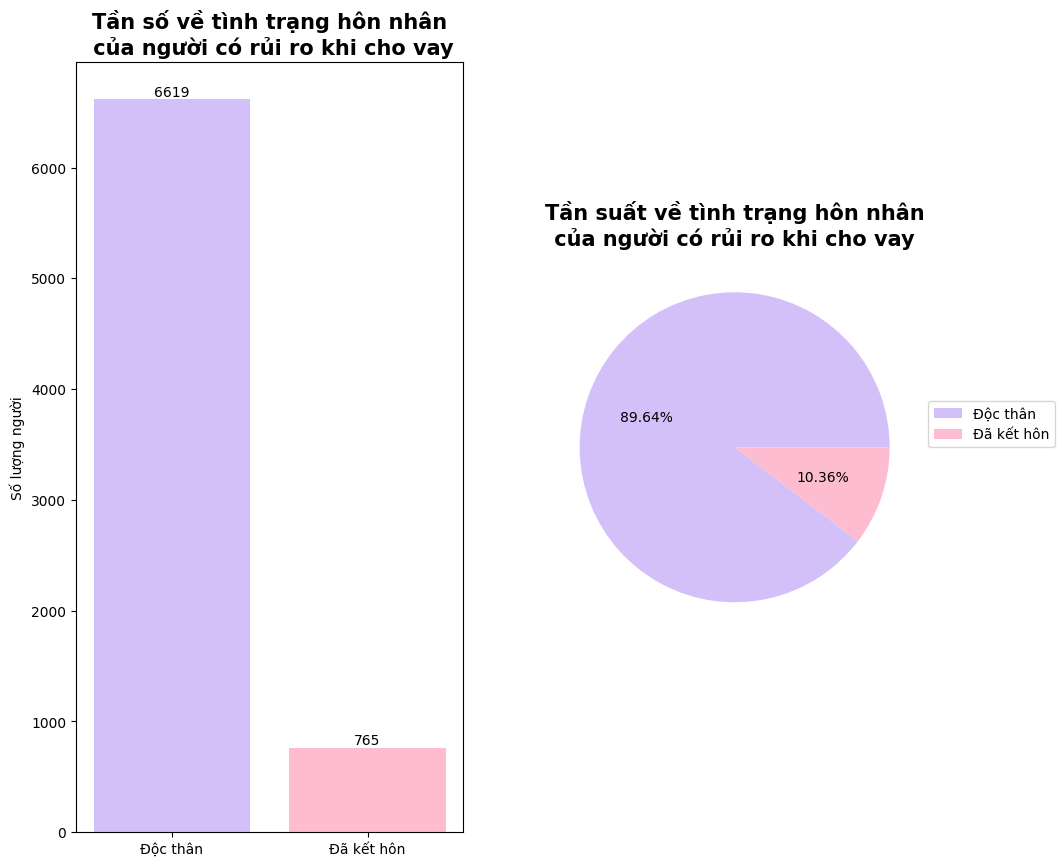

In [342]:
x = list(set(marital_status_1))
y = [len(single), len(married)]
tansuat_single = len(single)/len(marital_status_1)*100
tansuat_married = len(married)/len(marital_status_1)*100
tansuat = [tansuat_single, tansuat_married]

fig = plt.figure(figsize = (11,10))
ax1 = fig.add_subplot (1,2,1)
ax1.bar (x, y, color =["#D3C0F9","#FDBCCF"])
plt.xticks([0,1],["Độc thân", "Đã kết hôn"])
ax1.set_ylabel("Số lượng người")
ax1 = plt.gca()
ax1.bar_label(container = ax1.containers[0])
plt.title("Tần số về tình trạng hôn nhân\n của người có rủi ro khi cho vay", fontweight= "bold",fontsize=15)

ax2 = fig.add_subplot (1,2,2)
ax2.pie (tansuat, autopct = '%.2f%%',colors =["#D3C0F9","#FDBCCF"])
ax2.legend(labels = ["Độc thân", "Đã kết hôn"], loc = (1,0.5))
plt.title("Tần suất về tình trạng hôn nhân\n của người có rủi ro khi cho vay ", fontweight= "bold",fontsize=15)

plt.savefig("tình trạng hôn nhân.png", transparent=True)
plt.show()

## e. Phân tích về tình trạng sở hữu nhà của những người có rủi ro khi cho vay

In [221]:
norent_noown = []
owned = []
rented = []

for item in own_house_1:
    if item == "norent noown":
        norent_noown.append (item)
    elif item == "owned":
        owned.append(item)
    else:
        rented.append (item)

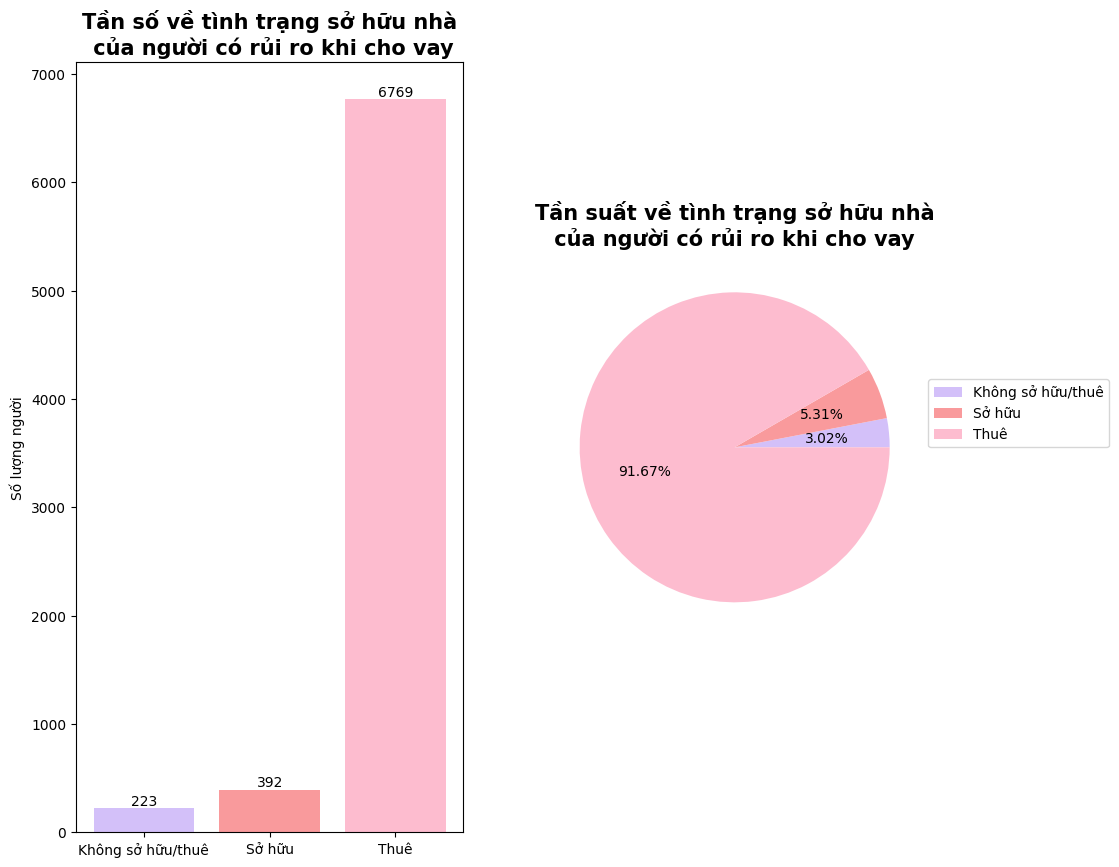

In [343]:
x = list(set(own_house_1))
y = [len(norent_noown), len(owned), len(rented)]
tansuat_norent_noown = len(norent_noown)/len(own_house_1)*100
tansuat_owned = len(owned)/len(own_house_1)*100
tansuat_rented = len(rented)/len(own_house_1)*100

tansuat = [tansuat_norent_noown, tansuat_owned, tansuat_rented]

fig = plt.figure(figsize = (11,10))
ax1 = fig.add_subplot (1,2,1)
ax1.bar (x, y, color =["#D3C0F9", "#F99A9C","#FDBCCF"])
plt.xticks([0,1,2],["Không sở hữu/thuê", "Sở hữu", "Thuê"])
ax1.set_ylabel("Số lượng người")
ax1 = plt.gca()
ax1.bar_label(container = ax1.containers[0])
plt.title("Tần số về tình trạng sở hữu nhà\n của người có rủi ro khi cho vay", fontweight= "bold",fontsize=15)

ax2 = fig.add_subplot (1,2,2)
ax2.pie (tansuat, autopct = '%.2f%%',colors =["#D3C0F9", "#F99A9C","#FDBCCF"])
ax2.legend(labels = ["Không sở hữu/thuê", "Sở hữu", "Thuê"], loc = (1,0.5))
plt.title("Tần suất về tình trạng sở hữu nhà\n của người có rủi ro khi cho vay ", fontweight= "bold",fontsize=15)

plt.savefig("tình trạng sở hữu nhà.png", transparent=True)
plt.show()

## f. Phân tích về tình trạng sở hữu xe của những người có rủi ro khi cho vay

In [227]:
no_car = []
have_car = []

for item in own_car_1:
    if item == "no":
        no_car.append (item)
    else:
        have_car.append (item)

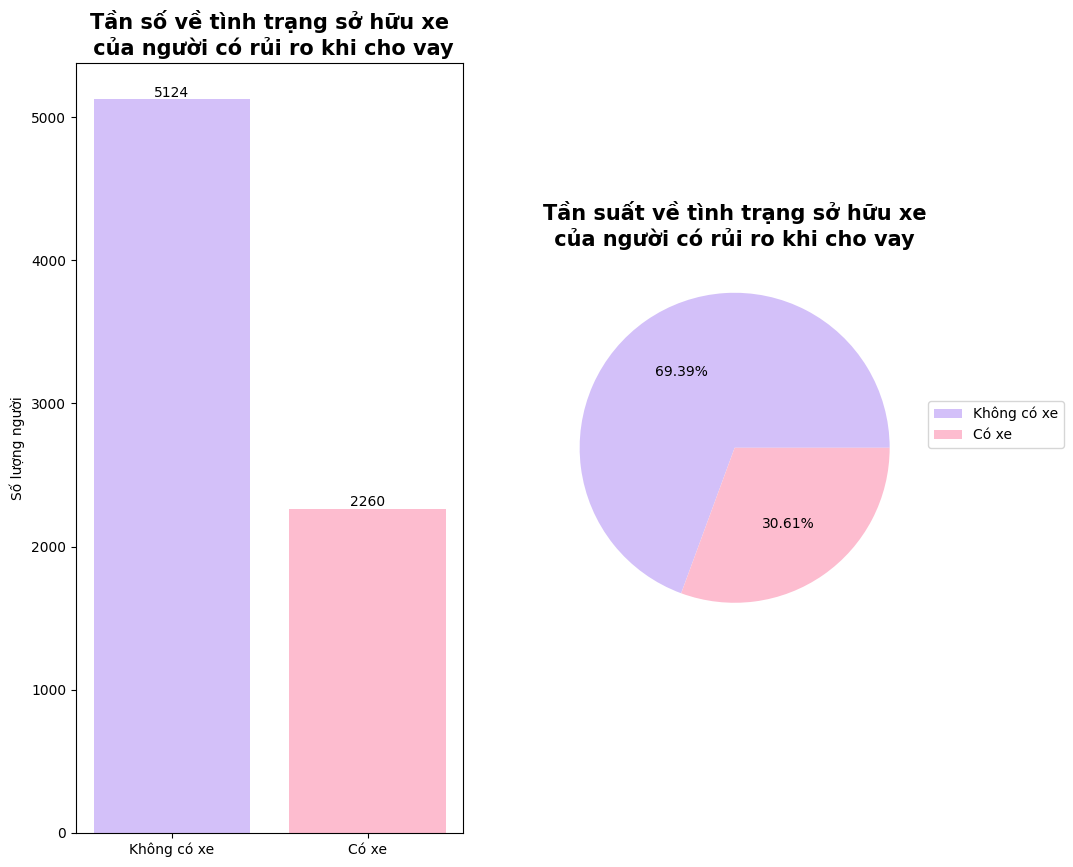

In [344]:
x = list(set(own_car_1))
y = [len(no_car), len(have_car)]
tansuat_nocar = len(no_car)/len(own_car_1)*100
tansuat_havecar = len(have_car)/len(own_car_1)*100
tansuat = [tansuat_nocar, tansuat_havecar]

fig = plt.figure(figsize = (11,10))
ax1 = fig.add_subplot (1,2,1)
ax1.bar (x, y, color =["#D3C0F9","#FDBCCF"])
plt.xticks([0,1],["Không có xe", "Có xe"])
ax1.set_ylabel("Số lượng người")
ax1 = plt.gca()
ax1.bar_label(container = ax1.containers[0])
plt.title("Tần số về tình trạng sở hữu xe\n của người có rủi ro khi cho vay", fontweight= "bold",fontsize=15)

ax2 = fig.add_subplot (1,2,2)
ax2.pie (tansuat, autopct = '%.2f%%',colors =["#D3C0F9","#FDBCCF"])
ax2.legend(labels = ["Không có xe", "Có xe"], loc = (1,0.5))
plt.title("Tần suất về tình trạng sở hữu xe\n của người có rủi ro khi cho vay ", fontweight= "bold",fontsize=15)

plt.savefig("tình trạng sở hữu xe.png", transparent=True)
plt.show()

##  g. Phân tích về nghề nghiệp của những người có rủi ro khi cho vay


In [231]:
ds_profession_1 = list(set(profession_1))
print(set_profession_1)

['Microbiologist', 'Geologist', 'Consultant', 'Biomedical engineer', 'Army officer', 'Librarian', 'Chartered accountant', 'Computer operator', 'Drafter', 'Civil servant', 'Computer hardware engineer', 'Graphic designer', 'Engineer', 'Financial analyst', 'Hotel manager', 'Civil engineer', 'Mechanical engineer', 'Statistician', 'Dentist', 'Technician', 'Firefighter', 'Magistrate', 'Analyst', 'Aviator', 'Flight attendant', 'Technology specialist', 'Physician', 'Comedian', 'Psychologist', 'Police officer', 'Fashion designer', 'Designer', 'Chef', 'Surveyor', 'Architect', 'Surgeon', 'Design engineer', 'Technical writer', 'Lawyer', 'Industrial engineer', 'Air traffic controller', 'Official', 'Economist', 'Scientist', 'Secretary', 'Artist', 'Petroleum engineer', 'Politician', 'Web designer', 'Software developer', 'Chemical engineer']


In [240]:
Army_officer = []
Graphic_designer = []
Software_developer= []
Technician= []
Artist= []
Psychologist= []
Chartered_accountant= []
Hotel_manager= []
Surveyor= []
Police_officer= []


for item in profession_1:
    if item == "Army officer":
        Army_officer.append (item)
    elif item == "Graphic designer":
        Graphic_designer.append (item)
    elif item == "Software developer":
        Software_developer.append (item)
    elif item == "Technician":
        Technician.append (item)
    elif item == "Artist":
        Artist.append (item)
    elif item == "Psychologist":
        Psychologist.append (item)
    elif item == "Chartered accountant":
        Chartered_accountant.append (item)
    elif item == "Hotel manager":
        Hotel_manager.append (item)
    elif item == "Surveyor":
        Surveyor.append (item)
    elif item == "Police officer":
        Police_officer.append (item)

    
        

In [242]:
print(len(Army_officer))
print(len(Graphic_designer))
print(len(Software_developer))
print(len(Technician))
print(len(Artist))
print(len(Psychologist))
print(len(Chartered_accountant))
print(len(Hotel_manager))
print(len(Surveyor))
print(len(Police_officer))


157
157
158
159
160
160
161
163
163
169


In [253]:
ds_profession_top10 = ["Army_officer", "Graphic_designer","Software_developer","Technician","Artist","Psychologist","Chartered_accountant","Hotel_manager","Surveyor","Police_officer"]

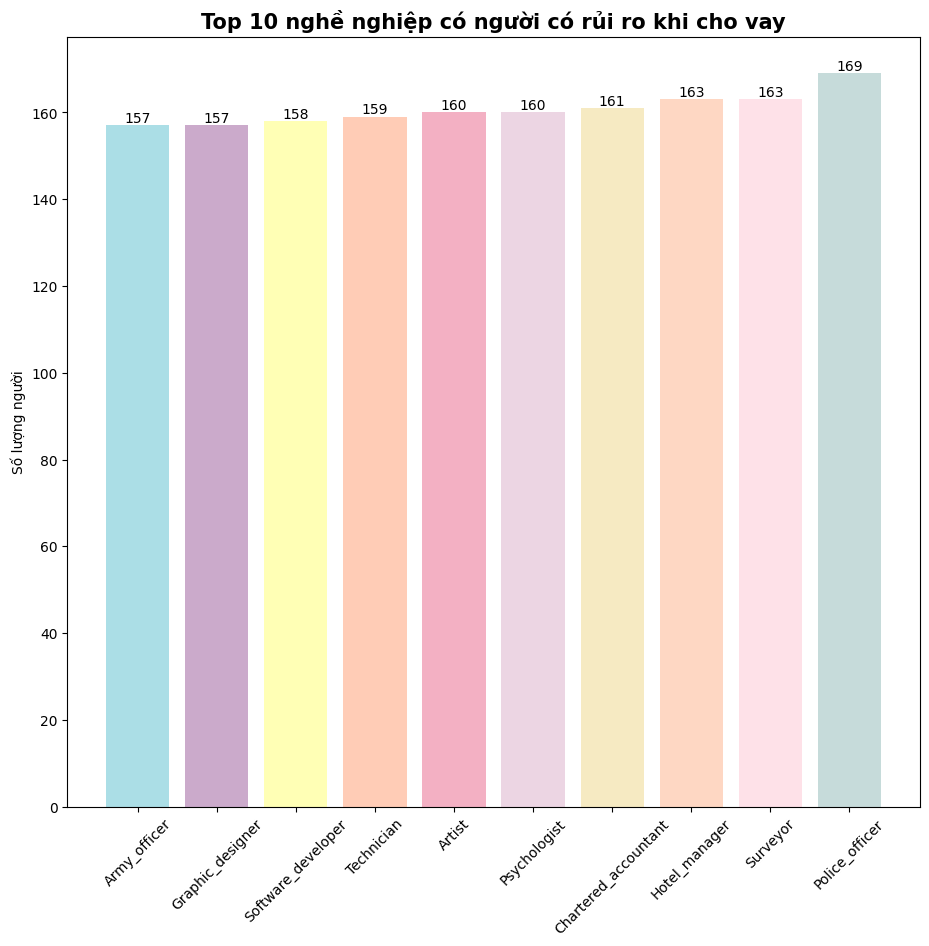

In [345]:
x = ds_profession_top10 
y = [157,157,158,159,160,160,161,163,163,169]


fig = plt.figure(figsize = (11,10))
ax1 = fig.add_subplot (1,1,1)
ax1.bar (x, y, color =["#ABDEE6","#CBAACB","#FFFFB5","#FFCCB6","#F3B0C3","#ECD5E3","#F6EAC2","#FED7C3","#FEE1E8","#C6DBDA"])
plt.xticks(x,rotation = 45)
ax1.set_ylabel("Số lượng người")
ax1 = plt.gca()
ax1.bar_label(container = ax1.containers[0])
plt.title("Top 10 nghề nghiệp có người có rủi ro khi cho vay", fontweight= "bold",fontsize=15)

plt.savefig("Top 10 nghề nghiệp có người có rủi ro khi cho vay.png", transparent=True)
plt.show()

## h. Phân tích về nơi cư trú của những người có rủi ro khi cho vay

In [309]:
Rajasthan=[]
Gujarat=[]
Karnataka=[]
Madhya_Pradesh=[]
Tamil_Nadu=[]
Bihar=[]
West_Bengal=[]
Maharashtra=[]
Andhra_Pradesh=[]
Uttar_Pradesh=[]

for item in state_1:
    if item == "Rajasthan":
        Rajasthan.append(item)
    elif item == "Gujarat":
        Gujarat.append(item)
    elif item == "Karnataka":
        Karnataka.append(item)
    elif item == "Madhya Pradesh":
        Madhya_Pradesh.append(item)
    elif item == "Tamil Nadu":
        Tamil_Nadu.append(item)
    elif item == "Bihar":
        Bihar.append(item)
    elif item == "West Bengal":
        West_Bengal.append(item)
    elif item == "Maharashtra":
        Maharashtra.append(item)
    elif item == "Andhra Pradesh":
        Andhra_Pradesh.append(item)
    elif item == "Uttar Pradesh":
        Uttar_Pradesh.append(item)

In [310]:
sizes = [len(Rajasthan),len(Gujarat),len(Karnataka),len(Madhya_Pradesh),len(Tamil_Nadu),len(Bihar),len(West_Bengal),len(Maharashtra),len(Andhra_Pradesh),len(Uttar_Pradesh)]

In [311]:
print(sizes)

[290, 309, 357, 426, 516, 528, 645, 760, 791, 804]


In [314]:
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [315]:
import squarify

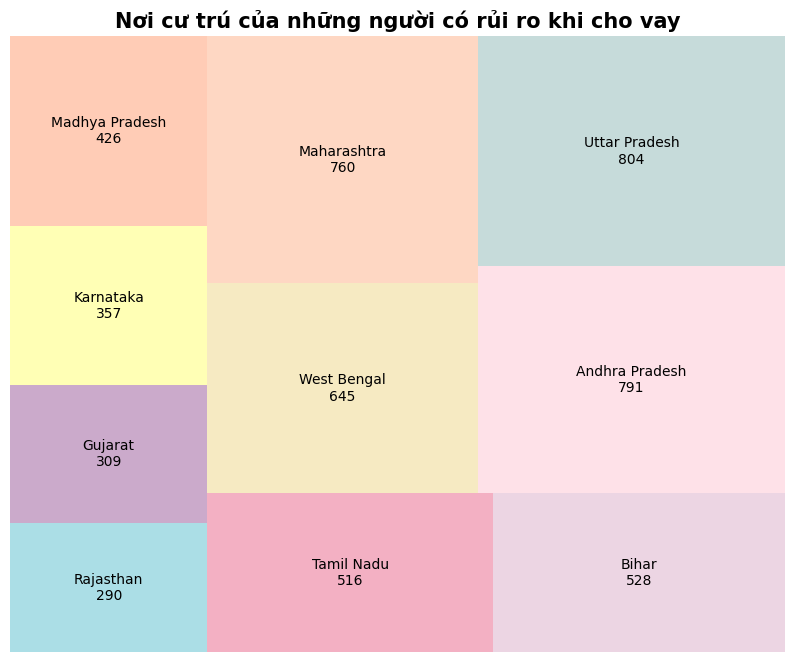

In [346]:
fig = plt.figure(figsize=(10,8))

squarify.plot(sizes =sizes,
              label= ['Rajasthan\n290','Gujarat\n309','Karnataka\n357','Madhya Pradesh\n426','Tamil Nadu\n516','Bihar\n528','West Bengal\n645','Maharashtra\n760','Andhra Pradesh\n791','Uttar Pradesh\n804'],
              color = ["#ABDEE6","#CBAACB","#FFFFB5","#FFCCB6","#F3B0C3","#ECD5E3","#F6EAC2","#FED7C3","#FEE1E8","#C6DBDA"])
plt.axis("off")
plt.title("Nơi cư trú của những người có rủi ro khi cho vay",fontweight="bold",fontsize=15)

plt.savefig("Nơi cư trú của những người có rủi ro khi cho vay.png", transparent=True)
plt.show()